In [1]:
############################################################
# CIS 521: Neural Network for Fashion MNIST Dataset
############################################################

student_name = "Shubhankar Patankar"

############################################################
# Imports
############################################################

import torch
import numpy as np
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Include your imports here, if any are used.
import numpy as np
import csv

In [2]:
# def load_data(file_path, reshape_images):
#     data = np.empty((20000, 785)) # 20000 examples, 1 (label) + 784 pixel values
#     with open(file_path) as csv_file:
#         csv_reader = csv.reader(csv_file)
#         fields = next(csv_reader)
#         for idx, row in enumerate(csv_reader):
#             data[idx, :] = np.array([int(x) for x in row])
#         images = data[:, 1:]
#         labels = data[:, 0]
#         if reshape_images:
#             images = images.reshape((20000, 1, 28, 28))
#     return images, labels

In [3]:
def load_data(file_path, reshape_images):
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file)
        fields = next(csv_reader)
        data = [data for data in csv_reader]
        data_array = np.asarray(data, dtype = int)
        images = data_array[:, 1:]
        labels = data_array[:, 0]
        if reshape_images:
            images = images.reshape((20000, 1, 28, 28))
    return images, labels

In [4]:
# def load_data(file_path, reshape_images):
#     dataset = pd.read_csv(file_path)
#     fields = list(dataset.columns.values)
#     all_images = dataset[fields[1:]]
#     all_labels = dataset[fields[0]]
#     all_images = np.array(all_images)
#     all_labels = np.array(all_labels)
#     if reshape_images:
#         all_images = all_images.reshape((20000, 1, 28, 28))
#     return all_images, all_labels

In [5]:
############################################################
# Neural Networks
############################################################

# def load_data(file_path, reshape_images):
# 	all_labels = []
# 	all_images = []
# 	with open(file_path) as csv_file:
# 		csv_reader = csv.reader(csv_file)
# 		fields = next(csv_reader)
# 		for row in csv_reader:
# 			all_labels.append(int(row[0]))
# 			all_images.append([int(x) for x in row[1:]])
# 	all_labels = np.array(all_labels)
# 	all_images = np.array(all_images)
# 	if reshape_images:
# 		all_images = all_images.reshape((20000, 1, 28, 28))
# 	return all_images, all_labels

In [6]:
# import matplotlib.pyplot as plt
# class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
# X, Y = load_data('dataset.csv', False)
# im_num = 110
# plt.imshow(X[im_num].reshape(28, 28), cmap='gray')
# plt.title(class_names[Y[im_num]])
# plt.show()

In [7]:
# PART 2.2
class EasyModel(torch.nn.Module):
    def __init__(self):
        super(EasyModel, self).__init__()
        self.fc = torch.nn.Linear(784, 10) # fc --> fully connected

    def forward(self, x):
        return self.fc(x)


# PART 2.3
class MediumModel(torch.nn.Module):
    def __init__(self):
        super(MediumModel, self).__init__()
        self.fc1 = torch.nn.Linear(784, 200)
        self.fc2 = torch.nn.Linear(200, 200)
        self.fc3 = torch.nn.Linear(200, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.nn.functional.log_softmax(x)


# PART 2.4
# class AdvancedModel(torch.nn.Module):
#     def __init__(self):
#         super(AdvancedModel, self).__init__()
#         self.layer1 = torch.nn.Sequential(
#             torch.nn.Conv2d(1, 16, kernel_size=5, padding=2),
#             torch.nn.BatchNorm2d(16),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(2))
#         self.layer2 = torch.nn.Sequential(
#             torch.nn.Conv2d(16, 32, kernel_size=5, padding=2),
#             torch.nn.BatchNorm2d(32),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(2))
#         self.fc = torch.nn.Linear(7*7*32, 10)
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.view(out.size(0), -1)
#         out = self.fc(out)
#         return out
    
class AdvancedModel(torch.nn.Module):
    def __init__(self):
        super (AdvancedModel,self).__init__()
        self.cnn1 = torch.nn.Conv2d(in_channels = 1, out_channels = 16, kernel_size = 5, 
                                    stride = 1, padding = 2)
        self.relu1 = torch.nn.ELU()
        torch.nn.init.xavier_uniform(self.cnn1.weight)
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size = 2)
        self.cnn2 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 5,
                                    stride = 1, padding = 2)
        self.relu2 = torch.nn.ELU()
        torch.nn.init.xavier_uniform(self.cnn2.weight)
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size = 2)
        self.fcl = torch.nn.Linear(32*7*7, 10)
        
    def forward(self,x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0),-1)
        out = self.fcl(out)
        return out

############################################################
# Fashion MNIST dataset
############################################################

class FashionMNISTDataset(Dataset):
    def __init__(self, file_path, reshape_images):
        self.X, self.Y = load_data(file_path, reshape_images)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

Epoch : 0/2, Iteration : 49/200,  Loss: 9.2148, Train Accuracy: 68.2450, Train F1 Score: 67.0986
Epoch : 0/2, Iteration : 99/200,  Loss: 8.2917, Train Accuracy: 75.4750, Train F1 Score: 74.8578
Epoch : 0/2, Iteration : 149/200,  Loss: 4.6708, Train Accuracy: 74.9800, Train F1 Score: 73.4677
Epoch : 0/2, Iteration : 199/200,  Loss: 6.3520, Train Accuracy: 74.7400, Train F1 Score: 73.4845
Epoch : 1/2, Iteration : 49/200,  Loss: 7.1773, Train Accuracy: 78.6400, Train F1 Score: 77.2018
Epoch : 1/2, Iteration : 99/200,  Loss: 6.7957, Train Accuracy: 80.1800, Train F1 Score: 80.0353
Epoch : 1/2, Iteration : 149/200,  Loss: 6.5816, Train Accuracy: 78.7650, Train F1 Score: 79.4272
Epoch : 1/2, Iteration : 199/200,  Loss: 6.7778, Train Accuracy: 79.4950, Train F1 Score: 79.9682
Easy Model: Final Train Accuracy: 79.4950, Final Train F1 Score: 79.9682


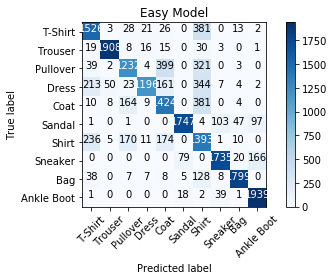

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch : 0/2, Iteration : 49/200,  Loss: 0.8706, Train Accuracy: 75.6800, Train F1 Score: 73.3931
Epoch : 0/2, Iteration : 99/200,  Loss: 0.4175, Train Accuracy: 80.0550, Train F1 Score: 80.2919
Epoch : 0/2, Iteration : 149/200,  Loss: 0.5652, Train Accuracy: 78.5500, Train F1 Score: 78.6095
Epoch : 0/2, Iteration : 199/200,  Loss: 0.5769, Train Accuracy: 81.5150, Train F1 Score: 81.0733
Epoch : 1/2, Iteration : 49/200,  Loss: 0.4976, Train Accuracy: 80.2550, Train F1 Score: 80.3359
Epoch : 1/2, Iteration : 99/200,  Loss: 0.7088, Train Accuracy: 82.2100, Train F1 Score: 81.6234
Epoch : 1/2, Iteration : 149/200,  Loss: 0.5125, Train Accuracy: 84.3900, Train F1 Score: 84.3814
Epoch : 1/2, Iteration : 199/200,  Loss: 0.4813, Train Accuracy: 84.0400, Train F1 Score: 83.9797
Medium Model: Final Train Accuracy: 84.0400, Final F1 Score: 83.9797


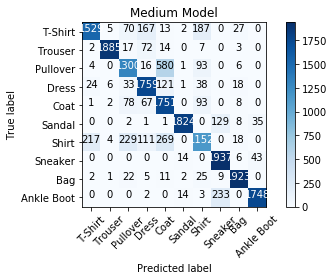

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


Epoch : 0/2, Iteration : 49/200,  Loss: 0.6475, Train Accuracy: 78.7250, Train F1 Score: 78.4139
Epoch : 0/2, Iteration : 99/200,  Loss: 0.2673, Train Accuracy: 83.9100, Train F1 Score: 83.6807
Epoch : 0/2, Iteration : 149/200,  Loss: 0.4309, Train Accuracy: 85.3300, Train F1 Score: 85.1527
Epoch : 0/2, Iteration : 199/200,  Loss: 0.4443, Train Accuracy: 86.7950, Train F1 Score: 86.5438
Epoch : 1/2, Iteration : 49/200,  Loss: 0.3568, Train Accuracy: 87.7900, Train F1 Score: 87.7403
Epoch : 1/2, Iteration : 99/200,  Loss: 0.3539, Train Accuracy: 88.1350, Train F1 Score: 88.2216
Epoch : 1/2, Iteration : 149/200,  Loss: 0.3773, Train Accuracy: 88.7850, Train F1 Score: 88.8910
Epoch : 1/2, Iteration : 199/200,  Loss: 0.2296, Train Accuracy: 89.4400, Train F1 Score: 89.3280
Advanced Model: Final Train Accuracy: 89.4400, Final F1 Score: 89.3280


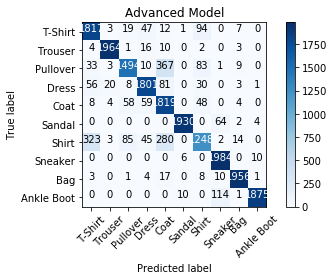

In [8]:
############################################################
# Reference Code
############################################################

def train(model, data_loader, num_epochs, learning_rate):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), learning_rate)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(data_loader):
            images = torch.autograd.Variable(images.float())
            labels = torch.autograd.Variable(labels)

            optimizer.zero_grad()
            outputs = model(images.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            if (i + 1) % 50 == 0:
                y_true, y_predicted = evaluate(model, data_loader)
                print(f'Epoch : {epoch}/{num_epochs}, '
                      f'Iteration : {i}/{len(data_loader)},  '
                      f'Loss: {loss.item():.4f},',
                      f'Train Accuracy: {100.* accuracy_score(y_true, y_predicted):.4f},',
                      f'Train F1 Score: {100.* f1_score(y_true, y_predicted, average="weighted"):.4f}')


def evaluate(model, data_loader):
    model.eval()
    y_true = []
    y_predicted = []
    for images, labels in data_loader:
        images = torch.autograd.Variable(images.float())
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_predicted.extend(predicted)
    return y_true, y_predicted


def plot_confusion_matrix(cm, class_names, title=None):
    plt.figure()
    if title:
        plt.title(title)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


def main():
    class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
    num_epochs = 2
    batch_size = 100
    learning_rate = 0.001
    file_path = 'dataset.csv'

    data_loader = torch.utils.data.DataLoader(dataset=FashionMNISTDataset(file_path, False),
                                              batch_size=batch_size,
                                              shuffle=True)
    data_loader_reshaped = torch.utils.data.DataLoader(dataset=FashionMNISTDataset(file_path, True),
                                                       batch_size=batch_size,
                                                       shuffle=True)

    # EASY MODEL
    easy_model = EasyModel()
    train(easy_model, data_loader, num_epochs, learning_rate)
    y_true_easy, y_pred_easy = evaluate(easy_model, data_loader)
    print(f'Easy Model: '
          f'Final Train Accuracy: {100.* accuracy_score(y_true_easy, y_pred_easy):.4f},',
          f'Final Train F1 Score: {100.* f1_score(y_true_easy, y_pred_easy, average="weighted"):.4f}')
    plot_confusion_matrix(confusion_matrix(y_true_easy, y_pred_easy), class_names, 'Easy Model')

    # MEDIUM MODEL
    medium_model = MediumModel()
    train(medium_model, data_loader, num_epochs, learning_rate)
    y_true_medium, y_pred_medium = evaluate(medium_model, data_loader)
    print(f'Medium Model: '
          f'Final Train Accuracy: {100.* accuracy_score(y_true_medium, y_pred_medium):.4f},',
          f'Final F1 Score: {100.* f1_score(y_true_medium, y_pred_medium, average="weighted"):.4f}')
    plot_confusion_matrix(confusion_matrix(y_true_medium, y_pred_medium), class_names, 'Medium Model')

    # ADVANCED MODEL
    advanced_model = AdvancedModel()
    train(advanced_model, data_loader_reshaped, num_epochs, learning_rate)
    y_true_advanced, y_pred_advanced = evaluate(advanced_model, data_loader_reshaped)
    print(f'Advanced Model: '
          f'Final Train Accuracy: {100.* accuracy_score(y_true_advanced, y_pred_advanced):.4f},',
          f'Final F1 Score: {100.* f1_score(y_true_advanced, y_pred_advanced, average="weighted"):.4f}')
    plot_confusion_matrix(confusion_matrix(y_true_advanced, y_pred_advanced), class_names, 'Advanced Model')

############################################################
# Feedback
############################################################

feedback_question_1 = """
-nil-
"""

feedback_question_2 = """
-nil-
"""

feedback_question_3 = 10

feedback_question_4 = """
-nil-
"""

feedback_question_5 = """
-nil-
"""

if __name__ == '__main__':
    main()

In [9]:
class_names = ['T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [10]:
num_epochs = 2
batch_size = 100
learning_rate = 0.001
data_loader = torch.utils.data.DataLoader(dataset=FashionMNISTDataset('dataset.csv', True),  batch_size=batch_size, shuffle=True)
advanced_model = AdvancedModel()
train(advanced_model, data_loader, num_epochs, learning_rate)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


Epoch : 0/2, Iteration : 49/200,  Loss: 0.4766, Train Accuracy: 80.3050, Train F1 Score: 80.4429
Epoch : 0/2, Iteration : 99/200,  Loss: 0.5146, Train Accuracy: 84.5500, Train F1 Score: 84.4192
Epoch : 0/2, Iteration : 149/200,  Loss: 0.3379, Train Accuracy: 85.8400, Train F1 Score: 85.9958
Epoch : 0/2, Iteration : 199/200,  Loss: 0.4691, Train Accuracy: 86.1050, Train F1 Score: 85.8063
Epoch : 1/2, Iteration : 49/200,  Loss: 0.3115, Train Accuracy: 88.4500, Train F1 Score: 88.4094
Epoch : 1/2, Iteration : 99/200,  Loss: 0.4309, Train Accuracy: 87.7000, Train F1 Score: 87.1872
Epoch : 1/2, Iteration : 149/200,  Loss: 0.2255, Train Accuracy: 89.0650, Train F1 Score: 89.0709
Epoch : 1/2, Iteration : 199/200,  Loss: 0.5268, Train Accuracy: 89.0150, Train F1 Score: 88.7278
